Author: Thibeau Wouters

# Physical Modelling of Complex Systems: Assignment 4

##### Import packages

In [67]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
#import scipy as scipy
from scipy.special import binom

import pandas as pd
import random

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Modern Roman',
     "figure.figsize": (8, 4),
    "axes.titlesize" : 26,
    "axes.labelsize" : 28,
    "lines.linewidth": 3,
     "legend.fontsize":24,
    "lines.markersize" : 10,
     "legend.fontsize": 16,
    "xtick.labelsize" : 24,
    "ytick.labelsize" : 24})

## 4.1 - Motifs in the E. Coli Gene Regulatory Network

Convention: all variables with capital letters are related to the given text file, and correspond to the E. Coli data. Variables with a similar name but in small font will be related to randomly generated networks (see later on).

$\textbf{Load the data}$

Load the data from the files.

In [3]:
DATA = pd.read_csv('coliInterFullVec.txt', sep=" ", header=None)
DATA.columns = ['x', 'y', 'interaction']

DATA = DATA.sort_values(by = ['x'])

In [4]:
DATA

,x,y,interaction
223,1,148,2
296,1,204,2
12,1,24,2
263,1,190,1
511,2,360,1
...,...,...,...
507,423,347,1
295,423,199,1
457,424,340,1
517,424,360,1


Save as seperate lists:

In [5]:
X = list(DATA.x); Y = list(DATA.y); INTERACTION = list(DATA.interaction)

Save the various types of interactions in a dictionary, and save number of edges and nodes.

In [6]:
#INTERACTIONS  = {1 : 'activator', 2 : 'repressor', 3 : 'unknown'}
N = 424 
E = 577

$ \textbf{Selfregulating proteins} $

In [7]:
def find_selfregulating(data):
    x = list(data.x); y = list(data.y); interaction = list(data.interaction);  
    
    N_self = 0
    N_a_self = 0
    N_r_self = 0

    N_self_unknown = 0

    for i in range(len(x)):
        if x[i] == y[i]:

            N_self += 1

            if interaction[i] == 1:
                N_a_self += 1

            elif interaction[i] == 2:
                N_r_self += 1

            elif interaction[i] == 3:
                N_self_unknown += 1
                
    return N_self, N_a_self, N_r_self, N_self_unknown

In [8]:
N_SELF, N_A_SELF, N_R_SELF, N_SELF_UNKNOWN = find_selfregulating(DATA)

In [9]:
print('In the file given to us, there are %d selfregulating proteins: %d are self activators, %d are self repressors and %d are unknown' % (N_SELF, N_A_SELF, N_R_SELF, N_SELF_UNKNOWN))

In the file given to us, there are 58 selfregulating proteins: 14 are self activators, 41 are self repressors and 3 are unknown


Analytic computation:

In [123]:
print('Average number of self-regulating proteins in a random network with E = %d and N = %d is %0.4f (analytic computation).' %(E, N, E/N))

Average number of self-regulating proteins in a random network with E = 577 and N = 424 is 1.3608 (analytic computation).


$ \textbf{Feed forward loop} $

Analytic computation:

In [128]:
p = E/N**2
print('The E. Coli network is sparse since p = E/N² = %0.4f << 1' % (p))

The E. Coli network is sparse since p = E/N² = 0.0032 << 1


In [136]:
N_FFL_av = N*(N-1)*(N-2)*p**3*PROB1**3
print('Expected number of FFL: %0.4f' % (N_FFL_av))

Expected number of FFL: 0.4897


Find the amount of feed forward loops in E. Coli using following Python functions.

In [10]:
def find_activators(data, N = 424, E = 577):
    '''Goes through dataframe, and saves all interactions X --> Y. N is number of nodes, E number of edges.'''
    
    activators_dict = {}
    x = list(data.x); y = list(data.y); interaction = list(data.interaction)
    
    # Create empty dict:
    
    for i in range(1, N + 1):
        activators_dict[i] = []
    
    # Go over each row in dataframe, and save the proteins that they activate
    for i in range(len(x)): 
        protein = x[i] # a number
        
        if interaction[i] == 1:
            activators_dict[protein].append(y[i])
    
    return activators_dict

In [11]:
ACTIVATORS_DICT = find_activators(DATA)

In [12]:
ACTIVATORS_DICT[424]

[340, 360, 242]

Find total number of activators

In [57]:
total = 0
for key in ACTIVATORS_DICT:
    total += len(ACTIVATORS_DICT[key])
total

335

In [61]:
def find_FFL(activators_dict):
    
    number_of_FFL = 0
    FFLs = []
    
    for x in activators_dict:
        for y in activators_dict[x]:
            if y != x:
                for z in activators_dict[y]:
                    if z != x and z != y:
                        if z in activators_dict[x]:
                             
                            number_of_FFL += 1
                            FFLs.append([x, y, z])
                    
    
    return number_of_FFL, FFLs

In [62]:
NUMBER_FFL_E_COLI, FFLS_E_COLI = find_FFL(ACTIVATORS_DICT)

In [63]:
FFLS_E_COLI

[[17, 18, 24],
 [23, 20, 66],
 [57, 56, 66],
 [67, 68, 293],
 [120, 127, 347],
 [129, 56, 66],
 [132, 137, 136],
 [135, 137, 136],
 [137, 136, 193],
 [140, 137, 136],
 [141, 137, 136],
 [142, 137, 136],
 [144, 24, 143],
 [150, 151, 66],
 [153, 242, 340],
 [233, 238, 66],
 [235, 238, 66],
 [237, 238, 66],
 [246, 247, 66],
 [268, 169, 347],
 [278, 242, 340],
 [358, 242, 340],
 [424, 242, 340]]

In [16]:
n1, n2, n3 = 0, 0, 0

for i in INTERACTION:
    if i == 1:
        n1 += 1
    
    if i == 2:
        n2 += 1
    
    if i == 3:
        n3 += 1


PROB1 = n1/E; PROB2 = n2/E; PROB3 = n3/E
PROBABILITIES = [PROB1, PROB2, PROB3]

In [17]:
print('In the given file, %0.2f %% of the interactions were activators, %0.2f %% were repressors, and %0.2f %% are unknown' % (100*PROB1, 100*PROB2, 100*PROB3))

In the given file, 58.06 % of the interactions were activators, 36.92 % were repressors, and 5.03 % are unknown


$ \textbf{Comparison with random networks} $

In [18]:
def choose_interaction(probabilities):
    '''Randomly chooses a type of interaction, based on given probabilities.'''
    
    prob1 = probabilities[0]; prob2 = probabilities[1]; prob3 = probabilities[2];  
    r = random.random()
    
    if r <= prob1:
        return 1
    
    elif prob1 < r <= (prob1 + prob2):
        return 2
    
    elif (prob1 + prob2) < r <= 1:
        return 3

In [19]:
def generate_random_network(n_nodes = N, n_edges = E, probabilities = PROBABILITIES):
    '''Generates a random network with N nodes and E edges, and probabilities for type of interaction.'''
    
    x = [];  y = []; interaction = []
    
    x_to_y = []
    e = 0
    
    # Keep generating until number of edges is reached
    while e < n_edges:
        
        # Generate possible values
        x_val = random.randint(1, n_nodes)
        y_val = random.randint(1, n_nodes)
        
        if [x_val, y_val] not in x_to_y: # don't generate two  interactions between same proteins, in the same "direction"
            interaction_type = choose_interaction(probabilities)
            
            x.append(x_val); y.append(y_val); interaction.append(interaction_type)
            
            # Save this and don't repeat this "direction"
            x_to_y.append([x, y])
            e += 1
    
    d = {'x': x, 'y': y, 'interaction': interaction}
    data = pd.DataFrame(data = d).sort_values(by = 'x')
    return data

In [20]:
random_data = generate_random_network()

In [137]:
#random_data

Check for a large number of random networks the number of FFL.

In [145]:
# Choose how many random networks should be generated 
nrep = 2000
FFL_list = []
self_regulating_list = []

# Generate nrep random networks and get number of selfregulating and FFL's
for n in range(nrep):
    random_network = generate_random_network()
    activators_dict = find_activators(random_network)
    number_of_FFL, FFLs = find_FFL(activators_dict)
    
    FFL_list.append(number_of_FFL)
    N_self, N_a_self, N_r_self, N_self_unknown =find_selfregulating(random_network)
    self_regulating_list.append(N_self)

# Get the average
FFL_av = np.mean(FFL_list)
self_regulating_av = np.mean(self_regulating_list)

In [147]:
print('After generating %d random networks, we found  %0.4f self regulating protein(s) and %0.4f FFL(s)  on average.' % (nrep, self_regulating_av,FFL_av))

After generating 2000 random networks, we found  1.3550 self regulating protein(s) and 0.4880 FFL(s)  on average.


## 4.2 - Positively autoregulated protein

In [25]:
def solve_ODE(f, t_vals, y0):
    '''Solves an ODE numerically. Assume t_vals is list of times, equally spaced from each other.'''
    
    # Create empty list to save calculated values
    y_vals = []
    
    # Get the value of Delta t for calculations
    DeltaT = abs(t_vals[1] - t_vals[0])
    
    for t in t_vals:
        if t == t_vals[0]:
            # Initial condition
            y_vals.append(y0)
            
        else:
            # Compute next value: discretised derivative
            val = y_vals[-1] + f(y_vals[-1])*DeltaT
            y_vals.append(val)
            
    return y_vals

In [26]:
def hill(x, beta = 1, K = 1/4, n = 2):
    '''Hill function. See equation (36) in Problem Set.'''
    return (beta*x**n)/(x**n + K**n)

In [27]:
def degradation(x, alpha = 1):
    return alpha*x

In [28]:
def xdot_auto(x, beta = 1, alpha = 1, K = 0.25, n = 1):
    '''Differential equation for autoregulated protein. Default values for exercise.'''
    
    return hill(x, beta = beta, K = K, n = n) - alpha*x

In [29]:
def xdot_non(x, beta = 1, alpha = 1):
    '''Differential equation for non-regulated protein. Default values for exercise.'''
    return beta - alpha*x

$ \textbf{Plot the solutions} $

In [30]:
alpha = 1; beta = 1; K = 0.25

Xstar = (beta - alpha*K)/alpha
print('The fixed point for the auto-regulated protein is located at %0.4f' % Xstar)

The fixed point is at 0.7500


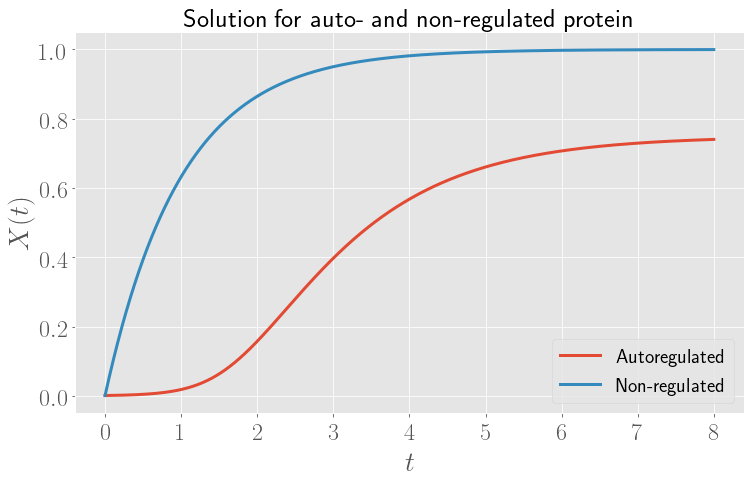

In [31]:
plt.figure(figsize = (12, 7))
# Obtain the values
y0 = 10**(-3)

t_vals = np.arange(0, 8, 0.0001)
y_vals_auto = solve_ODE(xdot_auto, t_vals, y0)
y_vals_non = solve_ODE(xdot_non, t_vals, y0)

# Plot it
plt.plot(t_vals, y_vals_auto, label = 'Autoregulated')
plt.plot(t_vals, y_vals_non, label = 'Non-regulated')

# Make fancy, save and show
plt.xlabel(r'$t$')
plt.ylabel(r'$X(t)$')
plt.title('Solution for auto- and non-regulated protein')
plt.legend(fontsize = 20, loc = 'lower right')

plt.savefig('ex2_auto_vs_non.pdf', bbox_inches = 'tight')
plt.show()

$ \textbf{Response times} $

In [32]:
T_R_non = np.log(2)
print('The response time for the non-regulated protein is %0.4f' % T_R_non)

The response time for the non-regulated protein is 0.6931


To look for the response time of the autoregulated system, use the graph above

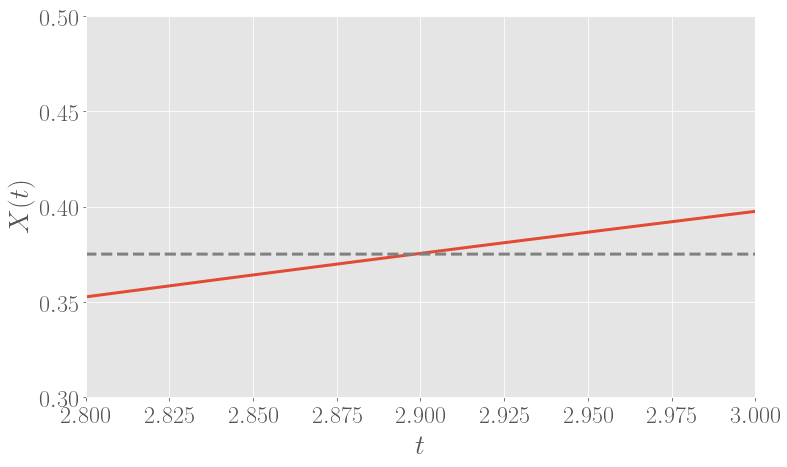

In [33]:
plt.figure(figsize = (12, 7))


# Plot solution and dashed line for Xstar/2
plt.plot(t_vals, y_vals_auto, label = 'Autoregulated')
plt.plot(t_vals, [Xstar/2 for t in t_vals], '--', color = 'grey')

# Make fancy, and show
plt.xlabel(r'$t$')
plt.ylabel(r'$X(t)$')

# Zoom in 
plt.xlim(2.8, 3)
plt.ylim(0.3, 0.5)

#plt.savefig('ex2_auto_vs_non.pdf', bbox_inches = 'tight')
plt.show()

Half of the stationary concentration is reached for $ t \approx 2.9 $

$ \textbf{Bistability}$

See this Desmos applet: https://www.desmos.com/calculator/f7h3cx8g1v .

## 4.4 - Genetic toggle switch

For the first few questions, see this Desmos applet: https://www.desmos.com/calculator/t4fzftgqps .

$ \textbf{Phase portrait} $

Define the right hand sides:

In [34]:
def F(X, Y, alpha = 1, beta = 1, K = 1/4, n = 2):
    return (beta*K**n)/(Y**n + K**n) - alpha*X

In [35]:
def G(X, Y, alpha = 1, beta = 1, K = 1/4, n = 2):
    return (beta*K**n)/(X**n + K**n) - alpha*Y

In [178]:
def symmetric_fixed_point(alpha = 1, beta = 1, K = 1/4):
    
    A = (beta*K**2)/(2*alpha)
    B = np.sqrt( (beta**2*K**4)/(4*alpha**2) + (K**6)/27 )
    
    if A - B < 0:
        return (A+B)**(1/3) - (-(A - B))**(1./3.)
    
    else:
        return  (A+B)**(1/3) + (A - B)**(1/3)

In [179]:
def asymmetric_fixed_point(alpha = 1, beta = 1, K = 1/4):
    return (beta + np.sqrt(beta**2 - 4*alpha**2*K**2))/(2*alpha)

Plot the phase portrait.

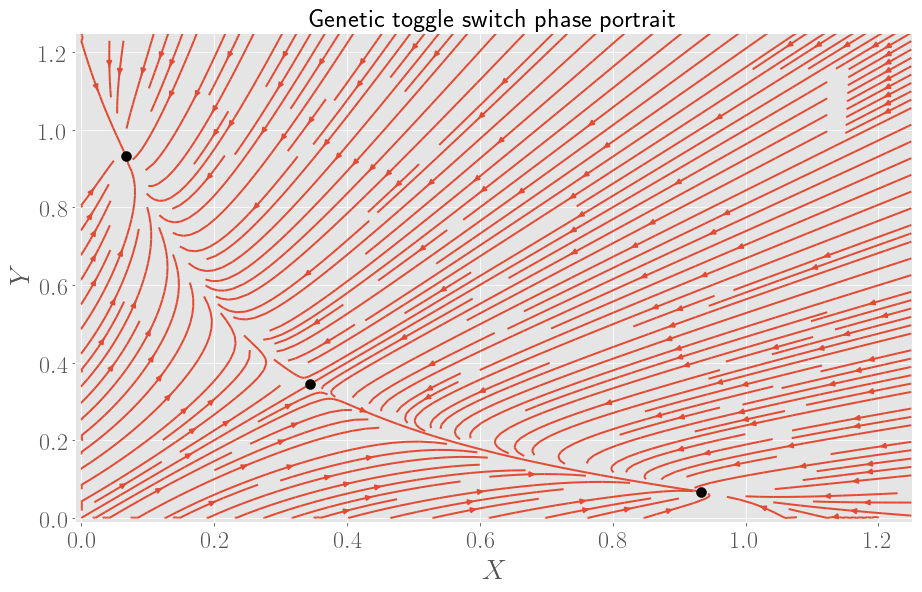

In [184]:
plt.figure(figsize = (15, 9))

# Values for parameters
alpha = 1
beta   = 1
K         = 1/4

# Get asymmetric fixed points:
X1 = asymmetric_fixed_point(alpha = alpha, beta = beta, K = K)
Y1 = K**2/X1

# Get symmetric fixed point:
X2 = symmetric_fixed_point(alpha = alpha, beta = beta, K = K)

# Width (for x and y) of the phase portrait grid
wx = 1.25
wy = 1.25

# Set up streamplot
X, Y = np.meshgrid(np.arange(0, wx, 0.0005), np.arange(0, wy, 0.0005))
U = F(X, Y, alpha = alpha, beta = beta, K = K)
V = G(X, Y, alpha = alpha, beta = beta, K = K)

# Plot  streamplot
plt.streamplot(X, Y, U, V, density = 2, linewidth = 2)


# Plot fixed points
plt.scatter(X1, Y1, color = 'black', zorder = 10)
plt.scatter(Y1, X1, color = 'black', zorder = 10)
plt.scatter(X2, X2, color = 'black', zorder = 10)
#plt.scatter(0.3447, 0.3447, color = 'black', zorder = 10)

# Make fancy, save and show
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.xlim(-0.01, wx)
plt.ylim(-0.01, wy)
plt.title('Genetic toggle switch phase portrait')

plt.savefig('ex4_4_phase_portrait.pdf', bbox_inches = 'tight')
plt.show()